# enviromental data

## intro

For this project, I looked for the best neighborhood in Pittsburgh through analyzing two data sets. I wanted to look at an enviromental POV so I am using neighborhoods with the most trees and neighborhoods with the most smart trashcans as the best neighborhood in Pittsburgh.

## the metric
i used these two data sets (https://data.wprdc.org/dataset/city-traffic-signs/resource/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c and https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da) that shows all the trees and smart trashcans in pittsburgh and their location. 

## the analysis
first i looked at trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tree_data = pd.read_csv("trees.csv")
tree_data

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,754166088,7428.0,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,2,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,3,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,4,994063598,608.0,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,5,1591838573,1135.0,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28789,28790,456689623,626.0,OLYMPIA RD,London planetree,Platanus x acerifolia,55.0,12.0,99.0,99.0,...,Mount Washington,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-1,40.428815,-80.018226
28790,28791,185728423,630.0,OLYMPIA RD,London planetree,Platanus x acerifolia,25.0,7.0,99.0,99.0,...,Mount Washington,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-1,40.428615,-80.018325
28791,28792,925142029,654.0,PENNRIDGE RD,London planetree,Platanus x acerifolia,25.0,15.0,99.0,99.0,...,Mount Washington,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-1,40.427972,-80.018142
28792,28793,968693657,650.0,PENNRIDGE RD,London planetree,Platanus x acerifolia,60.0,25.0,99.0,99.0,...,Mount Washington,2.0,19.0,4.200319e+10,5.0,19.0,3.0,4-1,40.428011,-80.017891


we only need the neighborhoods of the trees

In [2]:
tree_data = tree_data.filter(items=["neighborhood"])
tree_data

,neighborhood
0,Homewood North
1,Oakwood
2,South Side Flats
3,East Allegheny
4,Highland Park
...,...
28789,Mount Washington
28790,Mount Washington
28791,Mount Washington
28792,Mount Washington


group the trees by neighborhood

In [4]:
neighborhood_trees = tree_data.value_counts(ascending=False)
neighborhood_trees = pd.DataFrame(neighborhood_trees, columns=["trees"])
neighborhood_trees

,trees
neighborhood,
Squirrel Hill South,1886
Squirrel Hill North,1302
South Side Flats,1288
Shadyside,1112
Bloomfield,1058
...,...
Arlington Heights,3
Northview Heights,3
Esplen,2


In [5]:
dict = {'neighborhood':[],
        'trees':[]
       }
df = pd.DataFrame(dict)
n = ["Squirrel Hill South", "Squirrel Hill North", "Shadyside", "Northview Heights", "South Shore", "Highland Park", "Sheraden", "Elliott", "Bloomfield"]
for x in n:
    result = neighborhood_trees.loc[x]
    df.loc[len(df.index)] = [x, result.iloc[0, 0]]
df = df.sort_values(by=['trees'], ascending=False)
df

,neighborhood,trees
0,Squirrel Hill South,1886
1,Squirrel Hill North,1302
2,Shadyside,1112
8,Bloomfield,1058
5,Highland Park,835
6,Sheraden,213
7,Elliott,102
3,Northview Heights,3
4,South Shore,1


visual

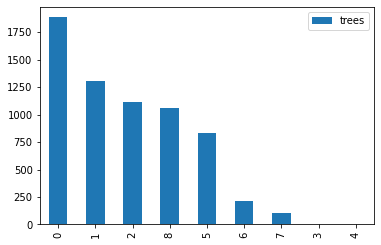

In [6]:
df.plot.bar()

too crowded so clean up a little, top 15 neighborhoods with the most trees

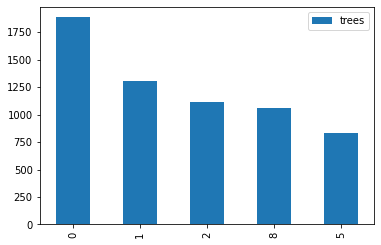

In [65]:
df_top = df.head(5)
df_top.plot.bar()

now lets do smart trashcans

In [9]:
trash_data = pd.read_csv("smarttrash.csv")
trash_data

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,221524,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,221525,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,221526,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,221527,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,221528,5,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,222713,1335,74,2021-08-17T09:17:16,2022-12-31T01:50:30,2nd Division,300 Larimer Avenue,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-10,-79.915790,40.464430
1190,222714,1336,74,2021-08-17T09:17:16,2022-12-31T01:38:18,2nd Division,25 Meadow Street,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.914449,40.465254
1191,222715,1337,74,2021-08-17T09:17:16,2022-12-31T01:44:35,2nd Division,6525 Meadow Street,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.910416,40.461669
1192,222716,1338,74,2021-08-17T09:17:16,2022-12-31T01:46:30,2nd Division,722 Larimer Avenue,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.910430,40.466880


we only need the neighborhoods of the trashcans

In [10]:
trash_data = trash_data.filter(items=["neighborhood"])
trash_data

,neighborhood
0,Central Northside
1,Marshall-Shadeland
2,Central Northside
3,Allegheny Center
4,Central Northside
...,...
1189,Larimer
1190,Larimer
1191,Larimer
1192,Larimer


group the trashcans by neighborhood

In [11]:
neighborhood_trash = trash_data.value_counts(ascending=False)
neighborhood_trash = pd.DataFrame(neighborhood_trash, columns=["trashcans"])
neighborhood_trash

,trashcans
neighborhood,
Shadyside,76
East Liberty,68
Squirrel Hill South,63
Bloomfield,58
North Shore,53
...,...
East Carnegie,1
South Shore,1
Mt. Oliver,1


In [12]:
dict = {'neighborhood':[],
        'trashcans':[]
       }
df = pd.DataFrame(dict)
n = ["Squirrel Hill South", "Squirrel Hill North", "Shadyside", "Northview Heights", "South Shore", "Highland Park", "Sheraden", "Elliott", "Bloomfield"]
for x in n:
    result = neighborhood_trash.loc[x]
    df.loc[len(df.index)] = [x, result.iloc[0, 0]]
df = df.sort_values(by=['trashcans'], ascending=False)
df

,neighborhood,trashcans
2,Shadyside,76
0,Squirrel Hill South,63
8,Bloomfield,58
1,Squirrel Hill North,22
6,Sheraden,16
5,Highland Park,12
7,Elliott,12
3,Northview Heights,1
4,South Shore,1


visualize top 15

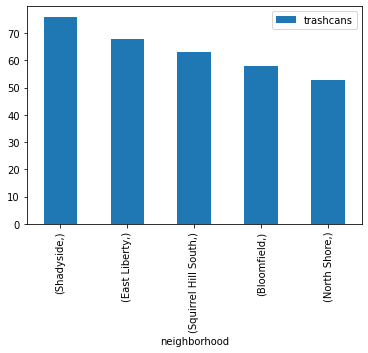

In [14]:
df_top = neighborhood_trash.head(5)
df_top.plot.bar()

# conclusion
from looking at both data sets, shadyside has the most trashcans but squirrel hill south haas the most trees, and when we look at it collectively shadyside is first for trash and fourth for trees but squirrel hill south is first for trees and third for trash so squirrel hill south seems like the better neighborhood.